In [29]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

BASE_URL = "http://localhost:3000"

# Create a new player
player_id = "test_player_001"
response = requests.post(f"{BASE_URL}/player", json={"playerId": player_id})
print("Create player:", response.json())

Create player: {'error': 'Player already exists'}


In [30]:
# Make some trades
trades = [
    # Early trades
    {"playerId": player_id, "symbol": "AAPL", "side": "buy", "quantity": 10, "T": 2},
    {"playerId": player_id, "symbol": "GOOGL", "side": "buy", "quantity": 5, "T": 5},
    {"playerId": player_id, "symbol": "MSFT", "side": "buy", "quantity": 8, "T": 7},
    
    # Some sells
    {"playerId": player_id, "symbol": "AAPL", "side": "sell", "quantity": 3, "T": 10},
    
    # More buying
    {"playerId": player_id, "symbol": "TSLA", "side": "buy", "quantity": 15, "T": 12},
    {"playerId": player_id, "symbol": "GOOGL", "side": "buy", "quantity": 3, "T": 15},
    {"playerId": player_id, "symbol": "AAPL", "side": "buy", "quantity": 5, "T": 18},
    
    # Mid-period activity
    {"playerId": player_id, "symbol": "MSFT", "side": "buy", "quantity": 10, "T": 22},
    {"playerId": player_id, "symbol": "TSLA", "side": "sell", "quantity": 5, "T": 25},
    {"playerId": player_id, "symbol": "NVDA", "side": "buy", "quantity": 20, "T": 28},
    
    # More trading
    {"playerId": player_id, "symbol": "GOOGL", "side": "sell", "quantity": 2, "T": 32},
    {"playerId": player_id, "symbol": "AAPL", "side": "buy", "quantity": 7, "T": 35},
    {"playerId": player_id, "symbol": "MSFT", "side": "sell", "quantity": 5, "T": 38},
    
    # Late period trades
    {"playerId": player_id, "symbol": "NVDA", "side": "buy", "quantity": 10, "T": 42},
    {"playerId": player_id, "symbol": "TSLA", "side": "buy", "quantity": 8, "T": 45},
    {"playerId": player_id, "symbol": "AAPL", "side": "sell", "quantity": 5, "T": 48},
    
    # Final trades
    {"playerId": player_id, "symbol": "GOOGL", "side": "buy", "quantity": 4, "T": 52},
    {"playerId": player_id, "symbol": "MSFT", "side": "buy", "quantity": 6, "T": 55},
    {"playerId": player_id, "symbol": "NVDA", "side": "sell", "quantity": 8, "T": 58},
]

for trade in trades:
    response = requests.post(f"{BASE_URL}/trade", json=trade)
    print(f"T={trade['T']:2d} | Trade {trade['symbol']:5s} {trade['side']:4s} x{trade['quantity']:2d} | {response.json()}")

print(f"\n✅ Total trades executed: {len(trades)}")

T= 2 | Trade AAPL  buy  x10 | {'message': 'Trade recorded'}
T= 5 | Trade GOOGL buy  x 5 | {'message': 'Trade recorded'}
T= 7 | Trade MSFT  buy  x 8 | {'message': 'Trade recorded'}
T=10 | Trade AAPL  sell x 3 | {'message': 'Trade recorded'}
T=12 | Trade TSLA  buy  x15 | {'message': 'Trade recorded'}
T=15 | Trade GOOGL buy  x 3 | {'message': 'Trade recorded'}
T=18 | Trade AAPL  buy  x 5 | {'message': 'Trade recorded'}
T=22 | Trade MSFT  buy  x10 | {'message': 'Trade recorded'}
T=25 | Trade TSLA  sell x 5 | {'message': 'Trade recorded'}
T=28 | Trade NVDA  buy  x20 | {'message': 'Trade recorded'}
T=32 | Trade GOOGL sell x 2 | {'message': 'Trade recorded'}
T=35 | Trade AAPL  buy  x 7 | {'message': 'Trade recorded'}
T=38 | Trade MSFT  sell x 5 | {'message': 'Trade recorded'}
T=42 | Trade NVDA  buy  x10 | {'message': 'Trade recorded'}
T=45 | Trade TSLA  buy  x 8 | {'message': 'Trade recorded'}
T=48 | Trade AAPL  sell x 5 | {'message': 'Trade recorded'}
T=52 | Trade GOOGL buy  x 4 | {'message'

In [31]:
# Get portfolio snapshots
T = 60  # Current time
response = requests.get(f"{BASE_URL}/portfolio/{player_id}", params={"T": T})
snapshots = response.json()

print(f"\nReceived {len(snapshots)} snapshots")
print("\nFirst snapshot:")
print(snapshots[0])
print("\nLast snapshot:")
print(snapshots[-1])


Received 61 snapshots

First snapshot:
{'cash': {'amount': 100000, 'price_per_share': 1, 'value': 100000}, 'timestamp': 0}

Last snapshot:
{'cash': {'amount': 79002.80999999998, 'price_per_share': 1, 'value': 79002.80999999998}, 'AAPL': {'quantity': 14, 'price_per_share': 270.62, 'value': 3788.6800000000003}, 'GOOGL': {'quantity': 10, 'price_per_share': 283.31, 'value': 2833.1}, 'MSFT': {'quantity': 19, 'price_per_share': 520.7, 'value': 9893.300000000001}, 'TSLA': {'quantity': 18, 'price_per_share': 0, 'value': 0}, 'NVDA': {'quantity': 22, 'price_per_share': 201.29, 'value': 4428.38}, 'timestamp': 60}


In [32]:
# Calculate total portfolio value for each snapshot
timestamps = []
total_values = []
cash_values = []
stock_values = []

for snapshot in snapshots:
    timestamps.append(snapshot['timestamp'])
    
    total_value = 0
    cash_value = snapshot['cash']['value']
    stock_value = 0
    
    for key, asset in snapshot.items():
        if key not in ['timestamp', 'cash']:
            stock_value += asset['value']
        total_value += asset['value'] if key != 'timestamp' else 0
    
    total_values.append(total_value)
    cash_values.append(cash_value)
    stock_values.append(stock_value)

# Create DataFrame for easier viewing
df = pd.DataFrame({
    'Time': timestamps,
    'Total Value': total_values,
    'Cash': cash_values,
    'Stocks': stock_values
})
print("\nPortfolio Summary:")
print(df)


Portfolio Summary:
    Time  Total Value       Cash    Stocks
0      0    100000.00  100000.00      0.00
1      1    100000.00  100000.00      0.00
2      2    100000.00   97291.50   2708.50
3      3    100000.40   97291.50   2708.90
4      4    100000.30   97291.50   2708.80
..   ...          ...        ...       ...
56    56     99964.14   77390.89  22573.25
57    57     99957.19   77390.89  22566.30
58    58     99960.46   79002.81  20957.65
59    59     99957.81   79002.81  20955.00
60    60     99946.27   79002.81  20943.46

[61 rows x 4 columns]


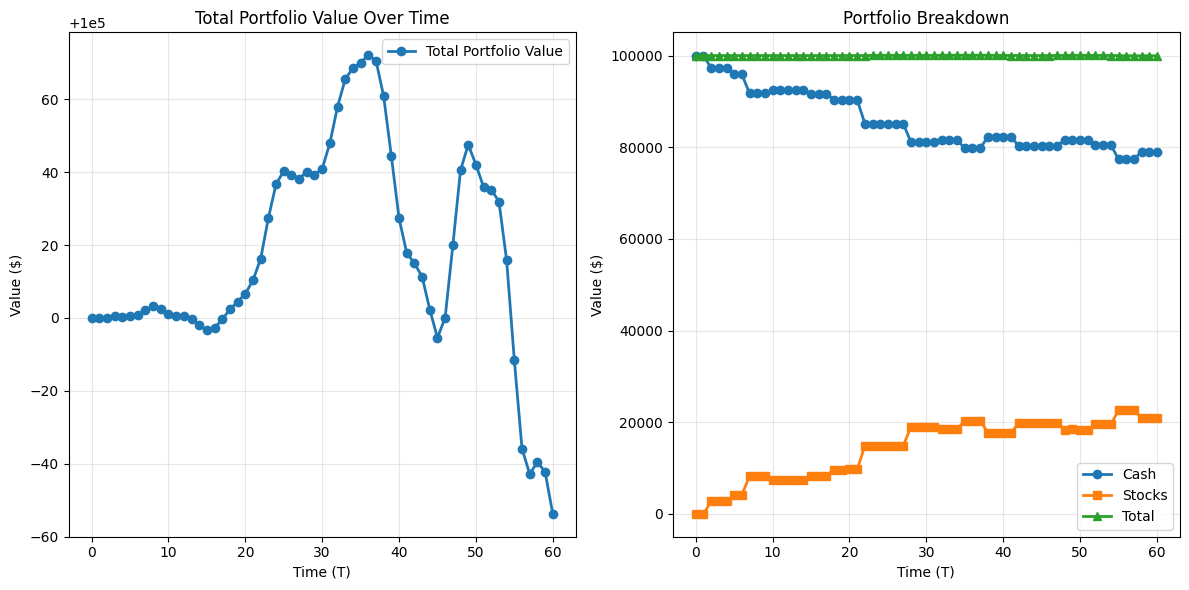


Initial Value: $100,000.00
Final Value: $99,946.27
Change: $-53.73 (-0.05%)


In [33]:
# Plot the portfolio value over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(timestamps, total_values, marker='o', linewidth=2, markersize=6, label='Total Portfolio Value')
plt.xlabel('Time (T)')
plt.ylabel('Value ($)')
plt.title('Total Portfolio Value Over Time')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(timestamps, cash_values, marker='o', label='Cash', linewidth=2, markersize=6)
plt.plot(timestamps, stock_values, marker='s', label='Stocks', linewidth=2, markersize=6)
plt.plot(timestamps, total_values, marker='^', label='Total', linewidth=2, markersize=6)
plt.xlabel('Time (T)')
plt.ylabel('Value ($)')
plt.title('Portfolio Breakdown')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nInitial Value: ${total_values[0]:,.2f}")
print(f"Final Value: ${total_values[-1]:,.2f}")
print(f"Change: ${total_values[-1] - total_values[0]:,.2f} ({((total_values[-1] - total_values[0]) / total_values[0] * 100):.2f}%)")